# HW7 - 房價預測
#### 【Python人工智慧實戰_2020-05-27】

### Linear Regression
dataset description: https://www.kaggle.com/c/boston-housing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
%matplotlib inline

# load csv file
labels = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
df = pd.read_csv('housing.csv', delim_whitespace=True, header=None) # 預測最後一個 column, delim_whitespace=True 空白隔開
df.columns = labels
print("df shape: {}".format(df.shape))
df.head()

df shape: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# check missing value
count_missing_val = df.isnull().sum().sum()
print("Number of missing value: {}".format(count_missing_val))

Number of missing value: 0


In [3]:
# separate features and label
X = df.iloc[:, :-1] # collect all columns and all rows except the last column
y = df.iloc[:, -1] # collect only the last column
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (506, 13)
y shape: (506,)


In [4]:
# split data into training data and testing data
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print("x_train shape: {}".format(X_train.shape))
print("x_test shape: {}".format(X_test.shape))

print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

x_train shape: (404, 13)
x_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [5]:
# normalize data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
print('X_train: {}'.format(X_train))

X_train: [[-2.76469903e-01 -5.07766334e-01 -4.02011945e-01 ...  1.17561917e+00
  -3.01968083e-04  8.35287872e-01]
 [-4.07463681e-01  3.33136528e+00 -1.43188822e+00 ... -2.20285923e+00
   4.12907260e-01 -1.32549534e+00]
 [ 8.06483214e+00 -5.07766334e-01  1.07815655e+00 ...  8.10378266e-01
  -3.84927565e+00  1.15819623e+00]
 ...
 [-3.88566725e-01 -5.07766334e-01 -1.71664438e-01 ...  3.53827130e-01
   3.87833612e-01  7.28600090e-01]
 [-3.82724087e-01 -5.07766334e-01 -3.79142727e-02 ...  7.98964487e-02
   4.05598798e-01 -2.14519905e-01]
 [-3.96910057e-01  2.90479510e+00 -1.32786031e+00 ...  1.63217031e+00
   1.93878260e-01 -9.82671938e-01]]


C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# build model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print(model)

# R2 coefficient of determination
print('coefficient of determination: {}'.format(model.score(X_train, y_train)))

# normalize test data 
X_test = scaler.transform(X_test)

# Make predictions using the testing set
y_pred = model.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
coefficient of determination: 0.738339392059052


C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


Scatter plot of 13 input X_test values 


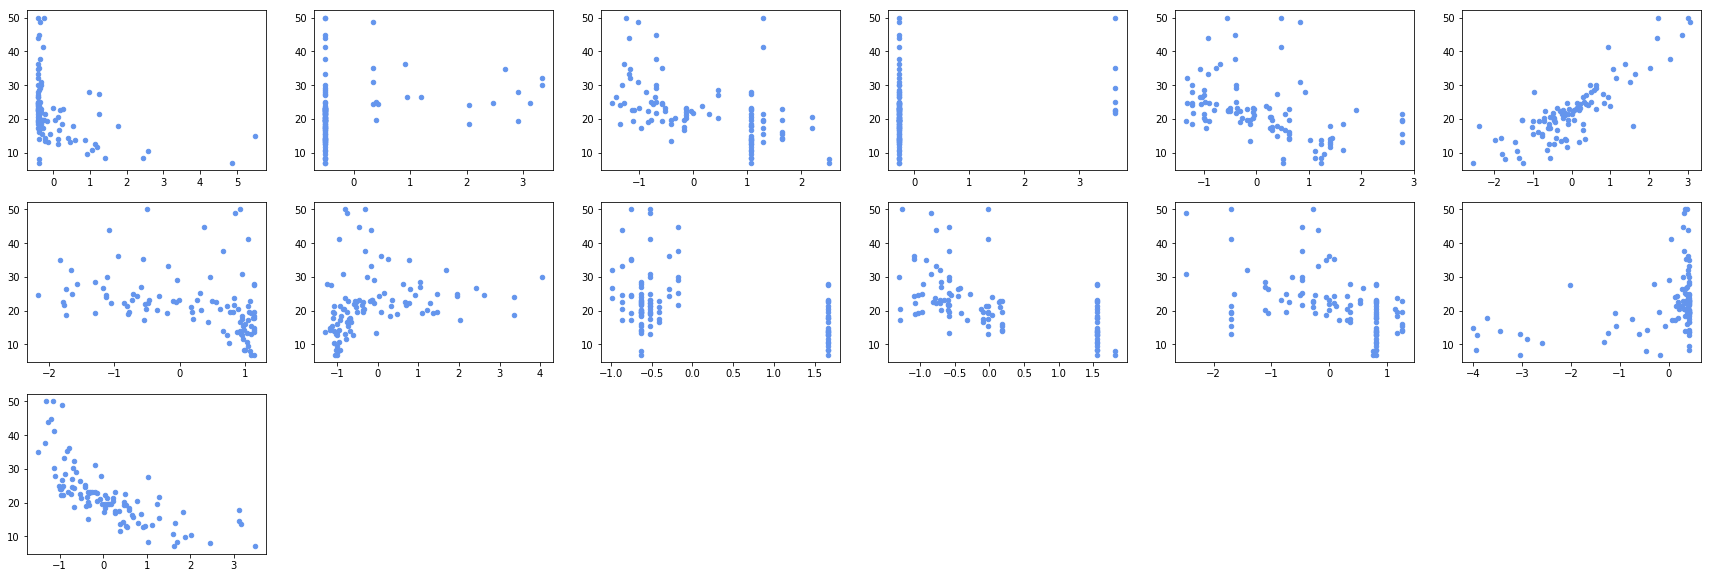

In [7]:
# evaluate result
nrows = 3
ncols = 6

print('Scatter plot of 13 input X_test values ')
plt.figure(figsize=(30, 10))
for i in range(1, 14):
    plt.subplot(nrows, ncols, i)
    X = X_test[:, i-1:i].ravel()
    y = y_test    
    plt.scatter(X, y, color='cornflowerblue', s=20)
    
plt.show()

In [8]:
# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test, y_pred)))

Coefficients: [-1.13502719  1.15814527  0.00737057  0.68709635 -1.82837001  2.36271879
  0.03166538 -3.06632775  3.16621482 -2.21457852 -2.08600876  1.0449511
 -4.17627077]

Mean squared error: 20.86929218377084
R2 score: 0.7334492147453072


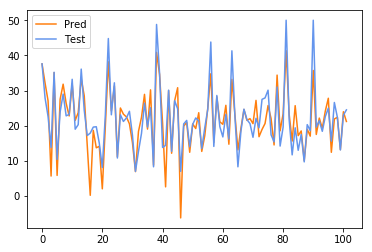

In [9]:
# 比較預測數值
y_test_p = np.array(y_test)
plt.plot(y_pred, color='C1', label='Pred')
plt.plot(y_test_p, color='cornflowerblue', label='Test')
plt.legend()
plt.show()

In [10]:
def build_model(X, y):
    # split data into training data and testing data
    seed = 5
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    
    # build model
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    
    # R2 coefficient of determination
    print('coefficient of determination: {}'.format(model.score(X_train, y_train)))
   
    # normalize test data
    X_test = scaler.transform(X_test)
    
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    
    # plot   
    plt.scatter(X_test, y_test, color='cornflowerblue', s=18)
    plt.plot(X_test, y_pred, color='C1', linewidth=3)
    plt.show()
    
    # The coefficients
    print('Coefficients: {}'.format(model.coef_))    
    # The mean squared error
    print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))    
    # Explained variance score: 1 is perfect prediction
    print('R2 score: {}\n'.format(r2_score(y_test, y_pred)))

【col_1】 Result:
coefficient of determination: 0.15130948174423697


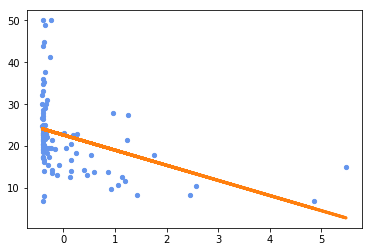

Coefficients: [-3.60523804]
Mean squared error: 66.92380714139914
R2 score: 0.14522288591819743

【col_2】 Result:
coefficient of determination: 0.14892603046952113


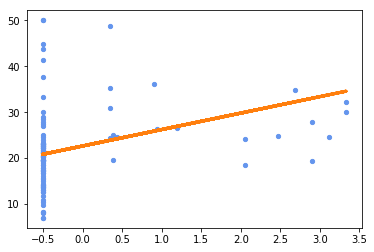

Coefficients: [3.57673019]
Mean squared error: 75.10830109944824
R2 score: 0.040687318912872694

【col_3】 Result:
coefficient of determination: 0.22621218969347145


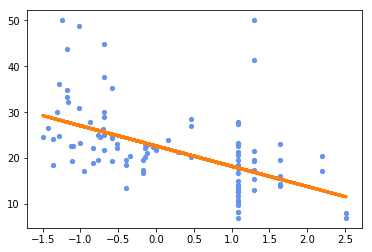

Coefficients: [-4.40817548]
Mean squared error: 57.56276184296058
R2 score: 0.26478582811726026

【col_4】 Result:
coefficient of determination: 0.026630566053891025


C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


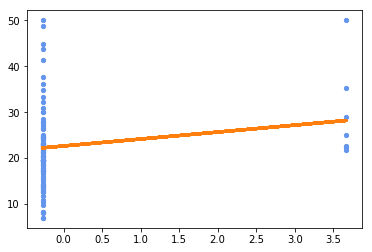

Coefficients: [1.51248499]
Mean squared error: 74.85865756754261
R2 score: 0.043875864019110034

【col_5】 Result:
coefficient of determination: 0.18228209716912813


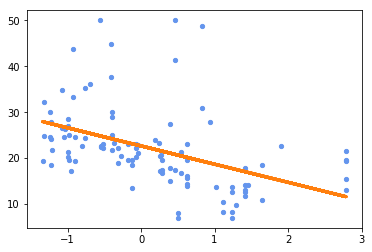

Coefficients: [-3.95706224]
Mean squared error: 64.12228379419477
R2 score: 0.18100504093960235

【col_6】 Result:
coefficient of determination: 0.4340897790637215


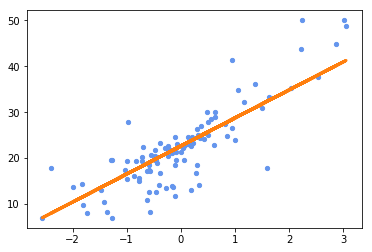

Coefficients: [6.10647598]
Mean squared error: 23.97045552799131
R2 score: 0.6938399401553497

【col_7】 Result:
coefficient of determination: 0.143432785607861


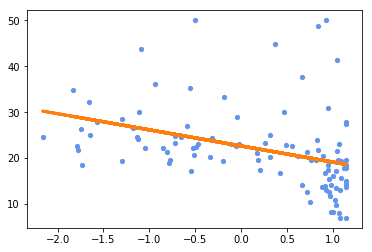

Coefficients: [-3.51014526]
Mean squared error: 67.84621870085209
R2 score: 0.1334414836868657

【col_8】 Result:
coefficient of determination: 0.06403661597646715


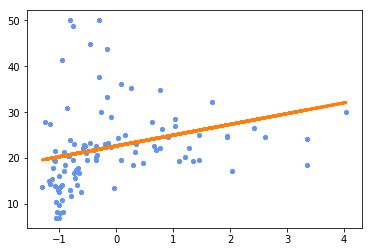

Coefficients: [2.34538995]
Mean squared error: 74.25783765836505
R2 score: 0.051549771556447466

【col_9】 Result:
coefficient of determination: 0.14327751929735832


C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\10708055\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


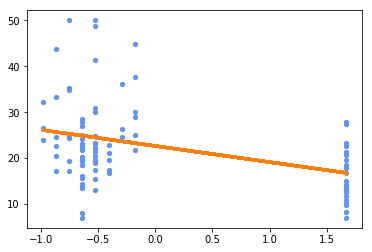

Coefficients: [-3.50824488]
Mean squared error: 66.36195010598259
R2 score: 0.15239914434959845

【col_10】 Result:
coefficient of determination: 0.20150464914201238


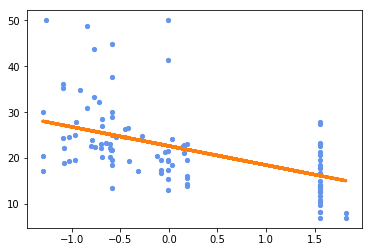

Coefficients: [-4.16047971]
Mean squared error: 55.27592896210288
R2 score: 0.29399415462738976

【col_11】 Result:
coefficient of determination: 0.26033288154359324


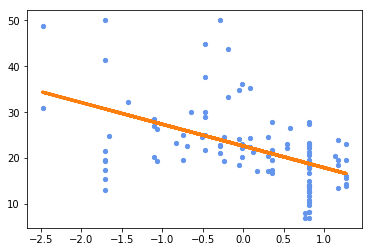

Coefficients: [-4.72895723]
Mean squared error: 59.15265212517366
R2 score: 0.24447912583618048

【col_12】 Result:
coefficient of determination: 0.10160292155648976


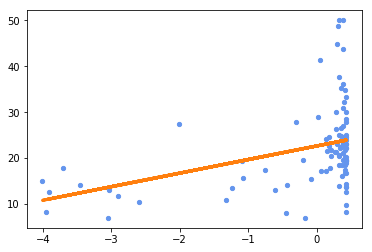

Coefficients: [2.95429576]
Mean squared error: 66.56597738624318
R2 score: 0.14979322790126148

【col_13】 Result:
coefficient of determination: 0.552301990803739


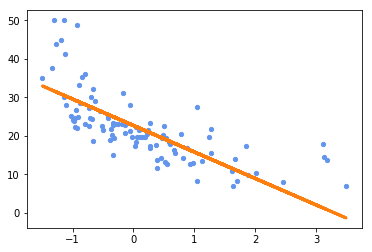

Coefficients: [-6.88793718]
Mean squared error: 38.82182901428659
R2 score: 0.5041523728903131



In [11]:
for i in range(1, 14):
    plt.figure(figsize=(6, 4))
    X = df.iloc[:, i-1:i]
    y = df.iloc[:, -1]
    
    print('【col_{}】 Result:'.format(i))
    build_model(X, y)   

### Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# separate features and label
X = df.iloc[:, :-1] # collect all columns and all rows except the last column
y = df.iloc[:, -1] # collect only the last column

# fitting Polynomial Regression to the dataset
degree = 2 # dimension of Polynomial (最高次方)
poly_reg  = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(X)
print(poly_reg)
print("X_poly shape: {}".format(X_poly.shape))

# split data into training data and testing data
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=seed)

# normalize data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# build model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# normalize test data
X_test = scaler.transform(X_test)
    
# Make predictions using the testing set
y_pred = model.predict(X_test)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
X_poly shape: (506, 105)


In [13]:
# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test, y_pred)))

Coefficients: [-4.67356724e-11 -4.41816739e+01 -3.88573770e+00 -4.01960433e+01
  6.17615385e+00  1.89265040e+01  1.52193856e+01  2.91973721e+01
 -1.16422885e+01  2.80148710e+01 -1.85037155e+00  1.17210920e+01
 -4.28258151e+00  5.29425190e+00  1.18751705e+00  6.25234015e-01
  9.26329359e+01  2.06058770e+00 -1.49074542e-01  4.73579929e+00
 -4.28545883e+00 -8.11947397e-01  7.46124446e+01 -2.24076924e+02
  9.53854353e+01 -9.12971114e-01  4.62881122e+00 -1.37463934e+00
 -6.04117076e-01 -6.18905651e-01 -1.25120185e+01  4.03918498e+00
  9.10989885e-02 -2.11879586e+00 -4.34613207e-01  4.41324269e+00
 -3.34929387e+00  1.68751009e+01 -7.20837599e-01  5.10029926e+00
 -7.74241116e-01  6.45854188e+00  1.27159396e+01  4.79373921e-01
  1.03355329e+00 -1.29761855e+00  1.99799981e+00 -9.06693052e-01
  1.61712547e+01 -8.40597314e-01  6.17615385e+00 -2.92909382e+00
 -1.13976569e+01  7.49646960e-01  2.51417559e+00 -1.34558553e+00
  2.56049695e+00 -3.77961698e+00  2.53922842e+00 -1.58449556e+00
 -6.4067957

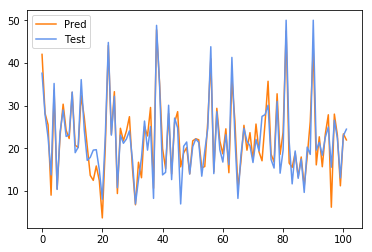

In [14]:
# 比較預測數值
y_test_p = np.array(y_test)
plt.plot(y_pred, color='C1', label='Pred')
plt.plot(y_test_p, color='cornflowerblue', label='Test')
plt.legend()
plt.show()

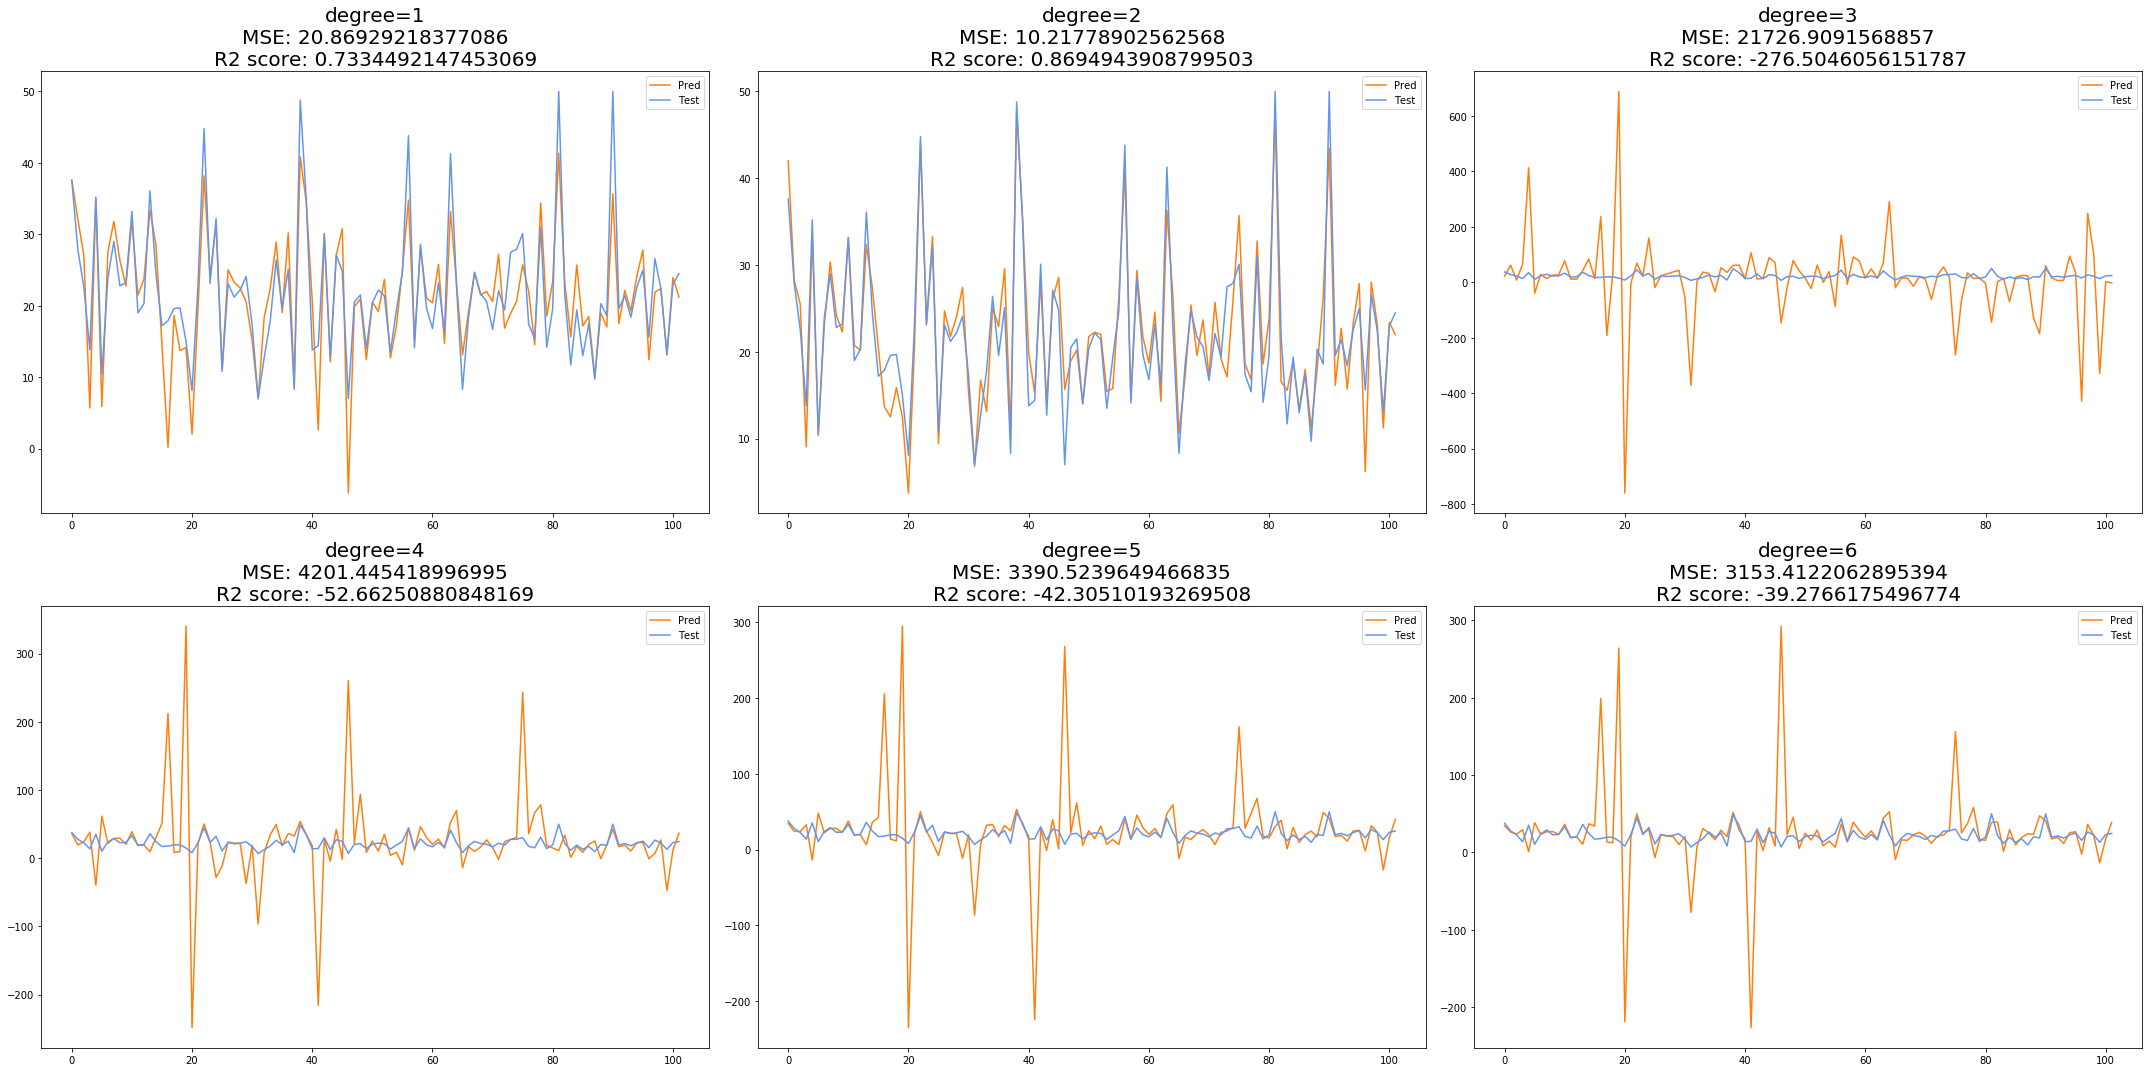

In [15]:
# choose best degree for Polynomial Regression
X = df.iloc[:, :-1] # collect all columns and all rows except the last column
y = df.iloc[:, -1] # collect only the last column

seed = 5
nrows = 2
ncols = 3
degrees = np.arange(1, 7)

plt.figure(figsize=(30, 15))
for deg in degrees:
    plt.subplot(nrows, ncols, deg)
    poly_reg  = PolynomialFeatures(deg)
    X_poly = poly_reg.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=seed)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    
    X_test = scaler.transform(X_test)
    y_pred = model.predict(X_test)
    
    # 比較預測數值
    y_test_p = np.array(y_test)
    plt.plot(y_pred, color='C1', label='Pred')
    plt.plot(y_test_p, color='cornflowerblue', label='Test')
    plt.legend()
    plt.title('degree={}\nMSE: {}\nR2 score: {}'.format(deg, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)), fontsize=20)

plt.tight_layout()
plt.show()